<a href="https://colab.research.google.com/github/Risqi2112/Penelitian/blob/main/Preprocessing_%26_Model_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jalankan Cell ini "HANYA" jika anda menggunakan Google Colab
# Jika di jalankan di komputer local, silahkan lihat NLPTM-02 untuk instalasinya.
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab; IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/dataset_tweet_sentiment_opini_film.csv
    !pip install spacy unidecode textblob sastrawi pyLDAvis
    !pip install --upgrade python-crfsuite gensim
    !pip install sklearn-pycrfsuite
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download xx_sent_ud_sm
    !python -m spacy download en_core_web_sm

    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2023-05-08 15:50:47--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]  13.67K  --.-KB/s    in 0s      

2023-05-08 15:50:47 (33.6 MB/s) - ‘taudataNlpTm.py’ saved [14001/14001]

--2023-05-08 15:50:47--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
# Importing Modules untuk Notebook ini
import taudataNlpTm as tau, itertools, re, pickle, pyLDAvis, spacy, urllib.request
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from tqdm import tqdm
from nltk.tag import CRFTagger
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups

pyLDAvis.enable_notebook()
sns.set(style="ticks", color_codes=True)
random_state = 99
'Done'

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


'Done'

Load Data

In [ ]:
import pandas as pd
file_ = '/content/prabowo_full_OK.csv'

data = pd.read_csv(file_)
data.to_csv(file_, encoding='utf-8', index=False)

col = data.columns
print("Kolom di data: ", col)
data = data[col[2]].values
data[:15]

Kolom di data:  Index(['title', 'href', 'body', 'date', 'Platform'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Ja Morant has been accused of allegedly beating up a 17-year-old boy and pointing a gun at him, per @CandaceDBuckner "The teenager told detectives from the Shelby County Sheriff\'s Office that, after the fight, Morant went into his house and re-emerged with a gun visible in the…',
       'PLEASE HURRY AND SAVE THEM OR SOMETHING I WILL DELETE THEM IN LIKE 1 HOUR!! This is what u came for 🖤 https://krakenfiles.com/view/h7PSUfDQOy/file.html…',
       'Zelensky very clearly argues that America will have to send its "sons and daughters" to the war and they "will be fighting" and "dying."',
       "C/O 2025 | 3 sport ATH 🏈🏀🏃🏾\u200d♂️5'9 | 150 | DB/WR | Will Rogers HS | GPA 3.5 | 40 yard: 4.4 ☎️918-633-1767 | HC @Levya73 | RC @CoachSmith918",
       'Easy to do for a guy worth a boatload. Oh, I guess that came later. Hmm, maybe something to the hard work, initiative, and determination pays off concept.',
       'Hahahahahahaha, eu amo essa mulher, é uma lenda! Fabrica do real life! Ju

In [ ]:
stopID, _ = tau.LoadStopWords(lang='id')
stopID.add('rt'); stopID.add('..')

for i,d in tqdm(enumerate(data)):
    data[i] = tau.cleanText(d, lan='id', lemma=True, stops=stopID, symbols_remove = True, min_charLen = 2)
    
print(data[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
340it [01:51,  3.06it/s]

ja morant has been accused of allegedly beating up boy and pointing gun at him candacedbuckner the teenager told detectives from the shelby county sheriff s office that after the fight morant went into his house and re-emerged with gun visible in the


In [ ]:
from spacy.lang.id import Indonesian
from nltk.tag import CRFTagger
nlp_id = Indonesian()  # Language Model

def NLPfilter(t, filters):
    tokens = nlp_id(t)
    tokens = [str(k) for k in tokens if len(k)>2]
    hasil = ct.tag_sents([tokens])
    return [k[0] for k in hasil[0] if k[1] in filters]

filters = set(['NN', 'NNP', 'NNS', 'NNPS', 'JJ'])

data_postTag = []
try:
    nlp_id = Indonesian()  # Language Model
    ct = CRFTagger()
    ct.set_model_file('data/all_indo_man_tag_corpus_model.crf.tagger')
    for i, d in tqdm(enumerate(data)):
        data_postTag.append(NLPfilter(d,filters))
    print(' '.join(data_postTag[0]))
    #data = [d for d in data_postTag if d]
except:
    data_postTag = data
    #data = [d.split() for d in data_postTag if d]
    print("CRFtagger Failed, try to run it locally (not using Google Colab).")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CRFtagger Failed, try to run it locally (not using Google Colab).


In [ ]:
print(data[:10])

['ja morant has been accused of allegedly beating up boy and pointing gun at him candacedbuckner the teenager told detectives from the shelby county sheriff s office that after the fight morant went into his house and re-emerged with gun visible in the'
 'please hurry and save them or something will delete them in like hour this is what came for'
 'zelensky very clearly argues that america will have to send its sons and daughters to the war and they will be fighting and dying'
 'sport ath db wr will rogers hs gpa yard hc rc'
 'easy to do for guy worth boatload oh guess that came later hmm maybe something to the hard work initiative and determination pays off concept'
 'hahahahahahaha eu amo essa mulher uma lenda fabrica do real life julguem-me torcendo pra ela'
 'sport ath db wr will rogers hs gpa yard hc rc'
 'crypto com suspends us dollars transfer via silvergate mar'
 'immersivemediaviewer'
 'ganjar pranowo prabowo subianto putra mahkota titip presiden joko widodo saksi lambe politi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data1 = pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data1.to_csv('Data_bersih.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Add LDA Matrix Decomposition

In [ ]:
# Kita mulai dengan membuat VSM-nya
# kita gunakan perintah yang ada di Segmen sebelumnya 
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

data = data.copy()
tf = tf_vectorizer.fit_transform(data)
tf_terms = tf_vectorizer.get_feature_names_out()
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Bisa di tamahkan dengan Frequency filtering "Max_df" dan "Min_df"

tf.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(340, 1503)

In [ ]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 3 # Misal tidak di optimalkan terlebih dahulu
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=3, random_state=0)

In [ ]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics
# Ukuran kolom = #Topics ==> Dimension Reduction
# Mengapa tidak dibagi Train & Test???

(340, 3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.00872651, 0.98364605, 0.00762743],
       [0.02134644, 0.02313745, 0.95551611],
       [0.01575701, 0.97067313, 0.01356987],
       ...,
       [0.96356311, 0.01809165, 0.01834524],
       [0.96356311, 0.01809165, 0.01834524],
       [0.45840601, 0.52307389, 0.0185201 ]])

In [ ]:
data2 = pd.DataFrame(vsm_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data2.to_csv('Hasil_skor_masing2_topic.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# "Seandainya" diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar atau disebut Hard Clustering/Pengelompokan saja namun bukan Soft Clustering/Topic Modelling
# Bagian ini bukan untuk kesimpulan/tujuan akhir, tetapi untuk melihat bagaimana topiknya terdistribusi dan bisa dijadikan "EDA"nya Topic Modelling
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
doc_topic[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 340/340 [00:00<00:00, 248313.31it/s]


[2, 3, 2, 2, 3, 2, 2, 2, 2, 3]

In [ ]:
data3 = pd.DataFrame(doc_topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data3.to_csv('Nilai_skor_topic_terbesar.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


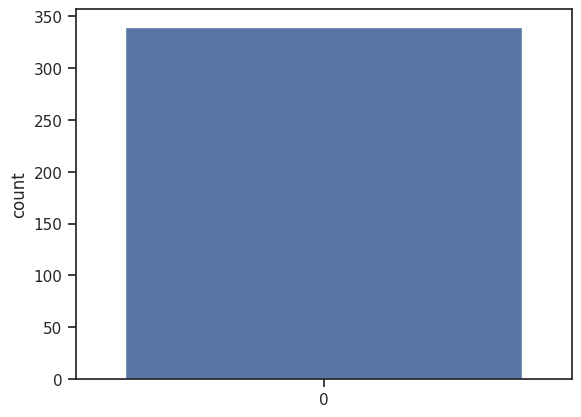

In [ ]:
# mari kita plot
plot = sns.countplot(doc_topic)

In [ ]:
# Mari kita coba maknai masing-masing topic ini
Top_Words = 25
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
tau.print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 3 Topics, with top 25 Words:
Topic #1:
comments likes partai ketua prabowo gerindra on instagram subianto from facebook views shares videos watch loves nasdem com presiden politik surya paloh audio original total
Topic #2:
prabowo subianto presiden gerindra instagram on likes comments ketua jokowi widodo joko partai ri ganjar tahan menteri pranowo kebumen damping politik duet jawa momen menhan
Topic #3:
prabowo subianto ketua partai gerindra presiden pakde ganjar mar jokowi pkb temu apr pilih calon koalisi capres pilpres muhaimin indonesia menteri bangkit iskandar pranowo dpp


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# %matplotlib inline
# Mari kita Plot, supaya lebih jelas
# Catatan, bergantung dari laptop yang digunakan, image terkadang cukup lama untuk muncul.
# import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

# pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
